$$t = 100 e^{-0.4((x-1)^2 + 0.7(y-3)^2)} + 80 e^{-0.2(2(x-5)^2 + 1.5(y-1)^2)}$$

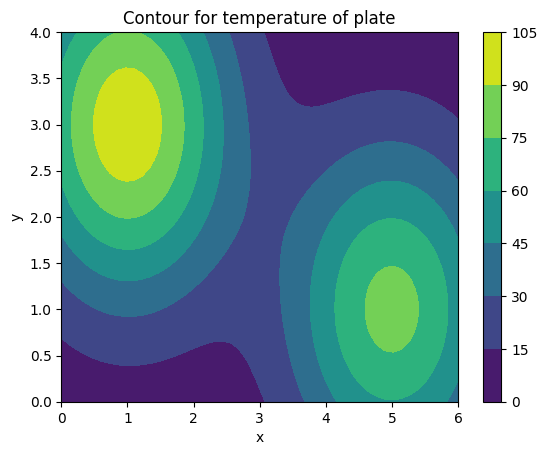

In [1]:
import matplotlib.pyplot as plt
import numpy as np

feature_x = np.linspace(0,6)
feature_y = np.linspace(0,4)

x,y = np.meshgrid(feature_x,feature_y)

t = 100*np.exp(-0.4*((x-1)**2 + 0.7*(y-3)**2)) + 80*np.exp(-0.2*(2*(x-5)**2 + 1.5*(y-1)**2))

#plotting filled contour

plt.contourf(x,y,t)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Contour for temperature of plate")
plt.savefig("heat dissipation.png")
plt.show()

In [2]:
#QUESTION B

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          6.77395028  7.34026544 ... 49.44977031 45.64908686
   0.        ]
 [ 0.          7.72585398  8.37152045 ... 51.62166973 47.65402377
   0.        ]
 ...
 [ 0.         60.40703717 65.43625568 ...  5.70611201  5.26467679
   0.        ]
 [ 0.         58.03162687 62.86305416 ...  4.95688238  4.57314182
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


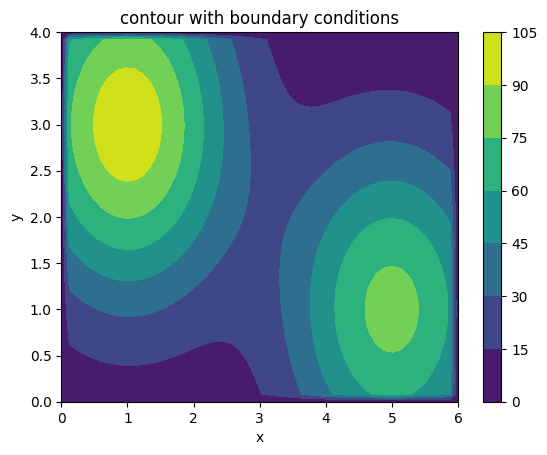

In [3]:
#boundary conditions
def cool(t):
    m,n=t.shape
    result = np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
        
            result[i,j] = t[i,j]
    return result

r = cool(t)
print(r)
plt.contourf(x,y,r)
plt.xlabel('x')
plt.ylabel('y')
plt.title('contour with boundary conditions')
plt.colorbar()
plt.savefig("heat dissipation2.png")
plt.show()

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          3.35684335  5.22623996 ... 33.61733834 21.5971723
   0.        ]
 [ 0.          5.38916615  8.39026127 ... 51.46981276 33.06633382
   0.        ]
 ...
 [ 0.         41.91605822 65.24479576 ...  5.7233939   3.67555287
   0.        ]
 [ 0.         27.41533043 42.67355838 ...  3.54706194  2.27786811
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


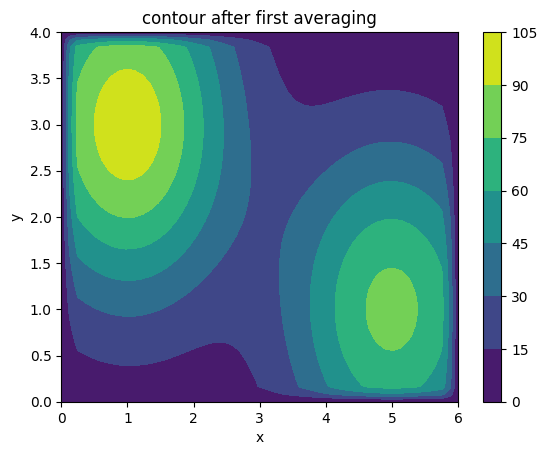

In [4]:
#first averaging
a,b=r.shape
k=np.zeros((a,b))
for i in range(1,a-1):
    for j in range(1,b-1):
        
        k[i,j]=(r[i,j-1]+r[i,j]+r[i+1,j]+r[i,j+1]+r[i-1,j+1]+r[i+1,j+1]+r[i+1,j-1]+r[i-1,j]+r[i-1,j-1])/9

print(k)

#contour for first averaging
plt.contourf(x,y,k)
plt.xlabel('x')
plt.ylabel('y')
plt.title('contour after first averaging')
plt.colorbar()
plt.savefig("heat dissipation3.png")
plt.show()


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          2.48472341  4.70276342 ... 31.75943627 21.24671889
   0.        ]
 [ 0.          3.85084964  7.07583759 ... 44.39249224 28.83909013
   0.        ]
 ...
 [ 0.         27.2117951  48.43930043 ...  4.46482544  2.81453257
   0.        ]
 [ 0.         15.03707606 25.27243246 ...  2.15847973  1.28314711
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


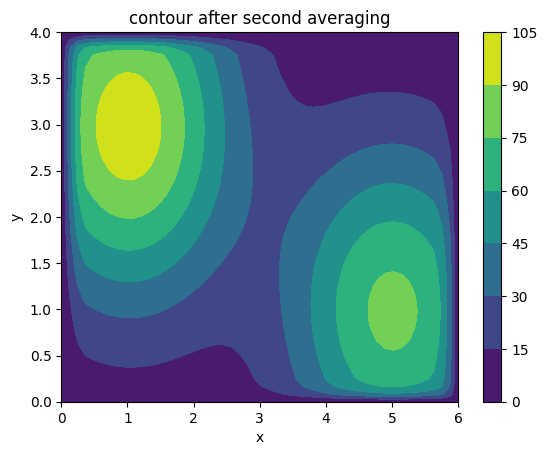

In [5]:
#second averaging
a1,b1=k.shape
k1=np.zeros((a1,b1))
for i in range(1,a1-1):
    for j in range(1,b1-1):
        
        k1[i,j]=(k[i,j-1]+k[i,j]+k[i+1,j]+k[i,j+1]+k[i-1,j+1]+k[i+1,j+1]+k[i+1,j-1]+k[i+1,j-1]+k[i-1,j-1])/9
        
print(k1)

#contour for second averaging
plt.contourf(x,y,k1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('contour after second averaging')
plt.colorbar()
plt.savefig("heat dissipation4.png")
plt.show()

In [6]:
#ANIMATION FOR PIXEL AVERAGING

In [7]:
#animation

import matplotlib.animation as animation
# Generate data for plotting
Lx =6
Ly =4
Nx = Ny = 50
Nt = 50

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
x,y = np.meshgrid(x,y)

def some_data(g):
    return k/(g+1)

fig =plt.figure()
ax = plt.axes(xlim=(0,Lx),ylim=(0,Ly))

cvals = np.linspace(0,100,Nt+1)      # set contour values 
cont = plt.contourf(x, y, some_data(0), cvals)    # first image on screen
plt.colorbar()

# animation function
def animate(g):
    global cont
    z = some_data(g)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x, y, z, cvals)
    #plt.title('t = %i:  %.f' % (i,z[2,2]))
    return cont

anim = animation.FuncAnimation(fig, animate)#,frames=Nt)
anim.save('cooling4PIXELAVERAGING.gif', writer='pillow')

C:\Users\nyony\AppData\Local\Temp\ipykernel_1836\2120307634.py:34: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, animate)#,frames=Nt)
C:\Users\nyony\AppData\Local\Temp\ipykernel_1836\2120307634.py:28: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in cont.collections:


In [ ]:
#GAUSSIAN

In [ ]:
#Outer product of level 2 pascals triangle
a=np.outer([1,2,1],[1,2,1])
a.shape

(3, 3)

In [ ]:
b=np.outer(a,t)
b.shape

(9, 2500)

SyntaxError: invalid syntax (3528599804.py, line 1)